In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [3]:
def sharpe_ratio(df):
    # Calculate daily returns
    df['returns'] = df['Wealth'].pct_change()
    
    # Calculate excess returns by subtracting risk-free rate
    df['excess_returns'] = df['returns'] - df['RF']
    
    # Calculate rolling 21 day mean of excess returns
    df['mean_excess_returns'] = df['excess_returns'].rolling(window=40).mean()
    
    # Calculate rolling 21 day standard deviation of excess returns
    df['std_excess_returns'] = df['excess_returns'].rolling(window=40).std()
    
    # Calculate rolling 21 day Sharpe Ratio
    df['SharpeRatio'] = df['mean_excess_returns'] / df['std_excess_returns']
    
    # Drop intermediate columns
    df.drop(['returns', 'excess_returns', 'mean_excess_returns', 'std_excess_returns'], axis=1, inplace=True)
    
    # Return dataframe with date and SharpeRatio columns
    return df[['date', 'SharpeRatio']]

In [4]:
datatype = 'broad'
EW_value = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
# TTrain_value = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))

In [5]:
plt.close("all")
plt.rcParams["font.family"] ="serif"
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['text.usetex'] = True

In [6]:
sharpe_results = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])


In [6]:
sharpe_results_broad

NameError: name 'sharpe_results_broad' is not defined

In [7]:
print(sharpe_results_broad.to_latex(index=False, float_format="{:.4f}".format))

NameError: name 'sharpe_results_broad' is not defined

In [279]:
datatype = 'broad'
MVO_value_broad = pd.read_pickle('ResultsMVO_{}_value.pkl'.format(datatype))
MVONormTrained_value_broad = pd.read_pickle('ResultsMVONormTrained_{}_value.pkl'.format(datatype))
RobMVO_value_broad = pd.read_pickle('ResultsRobMVO_{}_value.pkl'.format(datatype))

fig = plt.figure()
names = ['MVO', 'MVO - Learn $T$', 'Robust MVO']
frames = [MVO_value_broad, MVONormTrained_value_broad, RobMVO_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

For MVO. Mean: 0.0124464188943684. Vol: 0.01972862968819569. Sharpe: 0.6308810642746017
For MVO - Learn $T$. Mean: 0.033206770312067285. Vol: 0.028817354396985836. Sharpe: 1.1523184902615682
For Robust MVO. Mean: 0.010920479870547548. Vol: 0.036162970837489414. Sharpe: 0.30197961112272637


C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\2324162083.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)


For MVO. Mean: 0.004009920869098969. Vol: 0.008766735735048086. Sharpe: 0.45740181868011726
For MVO - Learn $T$. Mean: 0.0034778705348364448. Vol: 0.008642048576520355. Sharpe: 0.40243589283743403
For Robust MVO. Mean: 0.000508236483424955. Vol: 0.005953472376991892. Sharpe: 0.08536807618174444


C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\461683160.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\461683160.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_16104\461683160.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)


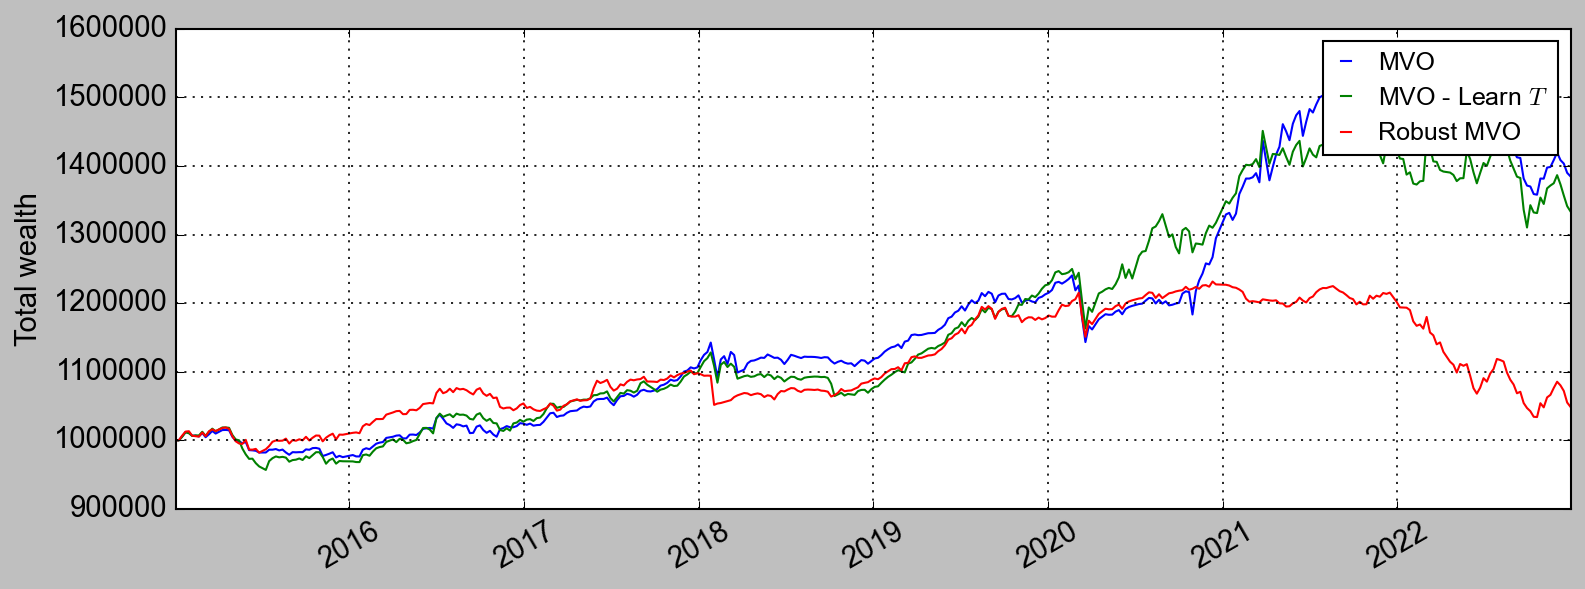

In [287]:
datatype = 'cross_asset'
MVO_value_broad = pd.read_pickle('ResultsMVO_{}_value.pkl'.format(datatype))
MVONormTrained_value_broad = pd.read_pickle('ResultsMVONormTrained_{}_lookback10_value.pkl'.format(datatype))
RobMVO_value_broad = pd.read_pickle('ResultsRobMVO_{}_value.pkl'.format(datatype))

fig = plt.figure()
names = ['MVO', 'MVO - Learn $T$', 'Robust MVO']
frames = [MVO_value_broad, MVONormTrained_value_broad, RobMVO_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

In [ ]:
'''
(i) apply ledoit and wolfes shrinkage estimate to the covariance of RP as a competitor
(ii) make it extremely clear via figures that we are essentially just predicting when EW beats RP (i.e. the rolling sharpe over the training set figure)
(iii) consider the case where we are learning the norm defined by the diagonal matrix
(iv) do an experiment on learning alpha where the resulting portfolio is alpha*x_{ew} + alpha x_{rp} (i.e. formulate this as a regression in alpha over the training set) ... x_{rp} and x_{ew} would have be constant
(v) learn some prediction model for when EW beats RP and embed that in the end to end distributionally robust RP i.e. identify features that predict the amount of correlation in the market) - we could construct a contrived example for covid period (i.e. have some analyst predict that correlations will spike so we use RP during 2020 crash which obviously beats EW)

'''




In [283]:
%matplotlib inline

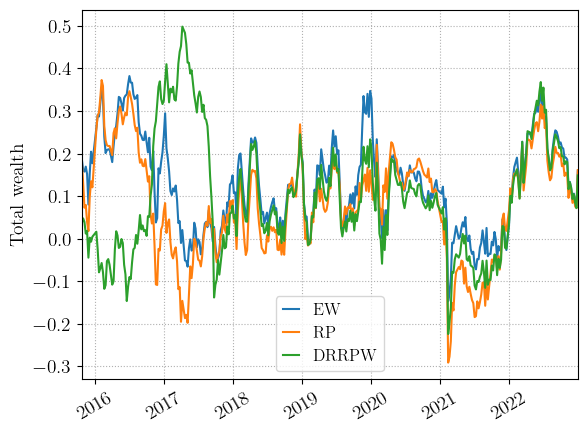

In [78]:
datatype = 'broad'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
DRRPW_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))

frames = [EW_value_broad, RP_value_broad, DRRPW_value_broad]
names = ['EW', 'RP', 'DRRPW']

fig,ax = plt.subplots()
for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

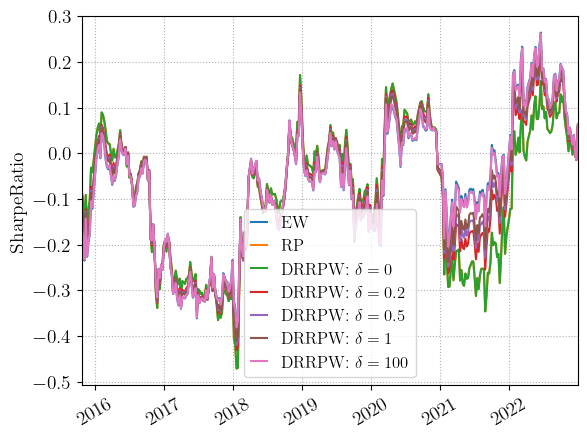

In [77]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
# NN_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_lookback52_value.pkl'.format(datatype))
# TTrain_value_broad = pd.read_pickle('ResultsDRRPWTTrained_{}_lookback52_value.pkl'.format(datatype))
# DRRPWTTrained_Diagonal_value_broad = pd.read_pickle('ResultsDRRPWTTrained_Diagonal_{}_lookback52_value.pkl'.format(datatype))
# RP_Shrinkage_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_lookback10_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Learn $\delta$', 'Learn T', 'RP w/ Shrinkage', 'Learn T - Diagonal']
frames = [EW_value_broad, RP_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    frame = sharpe_ratio(frame)
    ax.plot(frame['date'], frame['SharpeRatio'], label=names[indx])
    # frame = frame.set_index('date')
    # vol = frame['Wealth'].pct_change().std()
    # mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    # res = {
    #     'Strategy': names[indx],
    #     'Sharpe Ratio': (mu/(12*8))/vol,
    #     'Return': mu/(12*8),
    #     'Volatility': vol
    # }

    # sharpe_results_broad = sharpe_results_broad.append(res, ignore_index=True)

    # print("For {}. Mean: {}. Vol: {}. Sharpe: {}".format(names[indx], mu/(12*8), vol, (mu/(12*8))/vol))

for d in [0, 0.2, 0.5, 1, 100]:
    frame = pd.read_pickle('ResultsDRRPW_delta{}_{}_value.pkl'.format(d, datatype))
    frame = sharpe_ratio(frame)
    ax.plot(frame['date'], frame['SharpeRatio'], label='DRRPW: $\delta = {}$'.format(d))

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("SharpeRatio", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

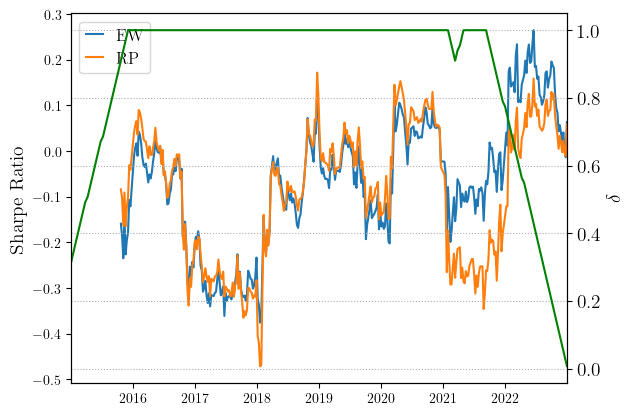

In [6]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
dates = pd.read_pickle('ResultsDRRPWDeltaTrained_cross_asset_holdings.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Train $\delta$']
frames = [EW_value_broad, RP_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])

with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
    delta_vals = pickle.load(f)

ax2 = ax.twinx()
ax2.plot(RP_value_broad['date'], delta_vals, 'g-')

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
ax2.set_ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.legend(fontsize=12, handlelength=1)


In [49]:
Q = np.array([[-0.00183181, 0.00010027, 0.00016991],
 [0.00010027, 0.00012983, 0.00021811],
 [0.00016991, -0.00021811,0.00117632]])

In [52]:
Q

array([[-0.82508077,  0.04516344,  0.07653058],
       [ 0.04516344,  0.05847781,  0.09824074],
       [ 0.07653058, -0.09824074,  0.52983607]])

In [51]:
Q/=np.linalg.norm(Q)

In [45]:
eig = np.array([1.88623686e-03, 1.16799092e-03, 8.37322230e-05])
1/np.linalg.norm(eig)*eig

array([0.84959562, 0.5260845 , 0.03771453])

In [9]:
y_perf = torch.tensor([[ 4.0669e-02, -9.7391e-03,  2.4111e-02],
        [ 2.9243e-02, -3.2071e-03, -1.9129e-03],
        [-7.3990e-03,  8.6821e-04, -3.1553e-02],
        [-1.8436e-02, -5.2065e-04, -6.0880e-03],
        [ 1.4164e-02, -5.6946e-03,  4.4383e-02],
        [ 3.7625e-02,  1.0355e-04,  4.3127e-02],
        [ 8.3439e-02, -6.8611e-03,  1.2712e-01],
        [ 9.7902e-02,  3.6998e-02,  1.4334e-01],
        [ 4.0000e-02,  1.4069e-02,  6.9233e-02],
        [-3.5088e-02, -2.0322e-02, -1.4791e-01],
        [-2.2634e-02,  2.1114e-03, -1.2120e-02],
        [-1.2195e-02, -1.2392e-03, -3.9179e-02],
        [ 1.2346e-02, -4.7569e-03, -2.1059e-02],
        [ 3.5291e-02, -3.6862e-03, -1.9021e-02],
        [-2.1334e-02, -5.1781e-03,  1.2272e-02],
        [-1.5732e-02,  3.8596e-03, -3.0530e-02],
        [-2.0107e-02, -1.9261e-03, -8.4746e-03],
        [-3.6728e-03, -2.0968e-03, -1.3642e-02],
        [-1.6808e-02, -1.5266e-03, -2.1175e-02],
        [-1.7988e-02,  3.4934e-04, -5.4610e-02],
        [ 1.2402e-02, -4.5210e-03,  5.2597e-02],
        [-1.4791e-02, -2.6015e-03, -1.5850e-02],
        [ 9.4125e-03, -1.5584e-03,  2.0233e-02],
        [-2.2215e-02,  9.1370e-04, -3.9710e-02],
        [-4.7378e-03, -1.7343e-04,  7.0194e-03],
        [-8.1454e-03, -3.9731e-03, -2.9230e-02],
        [-3.3313e-02, -3.8716e-03,  3.4033e-03],
        [-8.4084e-03, -1.7606e-03, -1.6941e-02],
        [-1.5957e-02, -3.4370e-04, -2.0204e-02],
        [-9.3909e-03,  4.1415e-03, -6.9249e-03],
        [ 4.7294e-03, -1.9805e-03, -1.4610e-02],
        [-2.0455e-02,  5.6287e-03, -1.8293e-02],
        [ 3.0582e-02, -4.9426e-03,  4.8318e-02],
        [-1.2896e-02, -1.8077e-03, -1.5511e-02],
        [ 4.7114e-03, -1.6329e-03,  3.0965e-02],
        [ 1.7876e-03, -6.0122e-04, -2.1604e-02],
        [-1.7845e-03,  1.5307e-03, -1.6394e-02],
        [-1.6758e-02, -2.9185e-03, -3.5950e-02],
        [-7.2205e-03, -3.5922e-03,  3.0467e-02],
        [ 2.8752e-04,  2.4005e-03,  7.7197e-03],
        [ 1.6365e-02, -1.3186e-03,  2.7832e-02],
        [-2.3959e-02,  5.3411e-03, -6.8705e-02],
        [-1.8477e-02, -4.1181e-03, -2.2092e-02],
        [-7.7778e-03, -3.4200e-03,  1.4295e-02],
        [-8.2645e-03, -6.8353e-04, -1.2705e-02],
        [-4.3884e-03, -2.6245e-04, -1.9047e-02],
        [-1.5127e-02, -2.7280e-03,  1.2148e-02],
        [-2.3291e-02,  9.3865e-04, -1.2923e-02],
        [-9.8050e-04, -6.9585e-04, -1.1581e-02],
        [-1.9131e-02, -1.0246e-03,  9.1651e-03],
        [-1.5220e-02,  4.9768e-03, -2.6143e-02]])

In [118]:
Q /= np.max(np.abs(Q),axis=0)

In [20]:
y_perf / torch.max(torch.abs(y_perf)).item()

tensor([[ 2.7496e-01, -6.5845e-02,  1.6301e-01],
        [ 1.9771e-01, -2.1683e-02, -1.2933e-02],
        [-5.0024e-02,  5.8699e-03, -2.1333e-01],
        [-1.2464e-01, -3.5200e-03, -4.1160e-02],
        [ 9.5761e-02, -3.8500e-02,  3.0007e-01],
        [ 2.5438e-01,  7.0009e-04,  2.9158e-01],
        [ 5.6412e-01, -4.6387e-02,  8.5944e-01],
        [ 6.6190e-01,  2.5014e-01,  9.6910e-01],
        [ 2.7043e-01,  9.5119e-02,  4.6808e-01],
        [-2.3723e-01, -1.3739e-01, -1.0000e+00],
        [-1.5303e-01,  1.4275e-02, -8.1942e-02],
        [-8.2449e-02, -8.3781e-03, -2.6488e-01],
        [ 8.3470e-02, -3.2161e-02, -1.4238e-01],
        [ 2.3860e-01, -2.4922e-02, -1.2860e-01],
        [-1.4424e-01, -3.5008e-02,  8.2969e-02],
        [-1.0636e-01,  2.6094e-02, -2.0641e-01],
        [-1.3594e-01, -1.3022e-02, -5.7296e-02],
        [-2.4831e-02, -1.4176e-02, -9.2232e-02],
        [-1.1364e-01, -1.0321e-02, -1.4316e-01],
        [-1.2161e-01,  2.3618e-03, -3.6921e-01],
        [ 8.3848e-02

In [69]:
np.max([x.numpy()[0] for x in grad_vals])
# [x.numpy()[0] for x in grad_vals]

0.0010589396

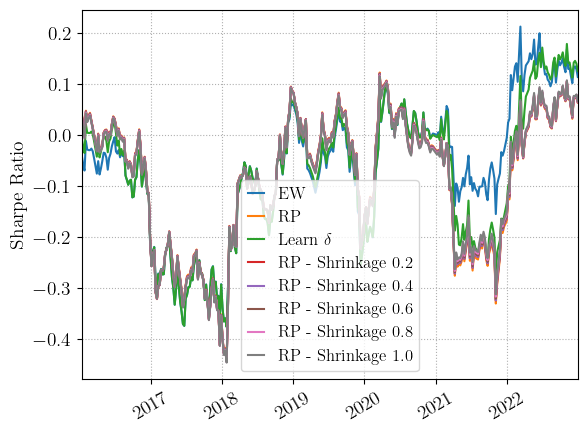

In [53]:
datatype = 'cross_asset'
EW_value_broad = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_broad = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
RPShrink0_value_broad = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
RPShrink02_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.2_value.pkl'.format(datatype))
RPShrink04_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.4_value.pkl'.format(datatype))
RPShrink06_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.6_value.pkl'.format(datatype))
RPShrink08_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink0.8_value.pkl'.format(datatype))
RPShrink1_value_broad = pd.read_pickle('ResultsRP_Shrinkage_{}_shrink1_value.pkl'.format(datatype))

fig, ax = plt.subplots()
names = ['EW', 'RP', 'Learn $\delta$', 'RP - Shrinkage 0.2', 'RP - Shrinkage 0.4', 'RP - Shrinkage 0.6', 'RP - Shrinkage 0.8', 'RP - Shrinkage 1.0']
frames = [EW_value_broad, RP_value_broad, RPShrink0_value_broad, RPShrink02_value_broad, RPShrink04_value_broad, RPShrink06_value_broad, RPShrink08_value_broad, RPShrink1_value_broad]
sharpe_results_broad = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    f = sharpe_ratio(frame)
    ax.plot(f['date'], f['SharpeRatio'], label=names[indx])

# with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
#     delta_vals = pickle.load(f)
    
# ax2 = ax.twinx()
# ax2.plot(EW_value_broad['date'], delta_vals, 'g-')

# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
ax.set_ylabel("Sharpe Ratio", fontsize=14)
# ax2.set_ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.legend(fontsize=12, handlelength=1)


(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

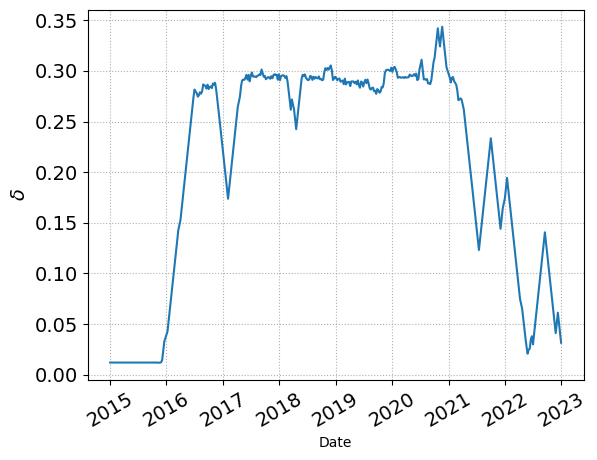

In [18]:
plt.plot(NN_value_broad['date'], delta_vals)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.xlabel('Date')
plt.ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
C:\Users\Rafay\AppData\Local\Temp\ipykernel_20048\3602776163.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

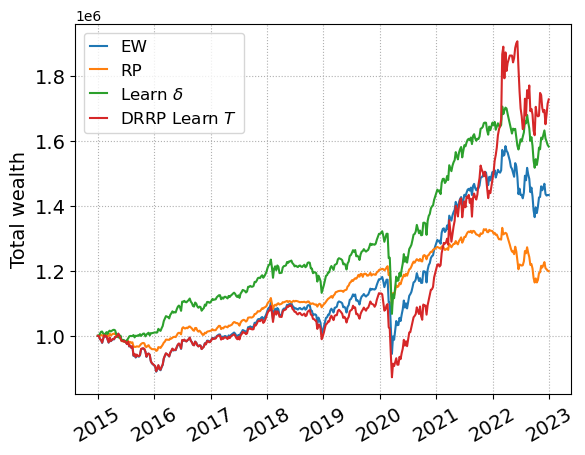

In [5]:
datatype = 'cross_asset'
EW_value_ca = pd.read_pickle('ResultsEW_{}_value.pkl'.format(datatype))
RP_value_ca = pd.read_pickle('ResultsRP_{}_value.pkl'.format(datatype))
NN_value_ca = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_value.pkl'.format(datatype))
TTrain_value_ca = pd.read_pickle('ResultsDRRPWTTrained_{}_value.pkl'.format(datatype))
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_ca, RP_value_ca, NN_value_ca, TTrain_value_ca]
sharpe_results_ca = pd.DataFrame(columns=['Strategy', 'Sharpe Ratio', 'Return', 'Volatility'])

for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
    frame = frame.set_index('date')
    vol = frame['Wealth'].pct_change().std()
    mu = frame.loc["2022-12-30"]['Wealth']/frame.loc["2015-01-02"]['Wealth']-1

    res = {
        'Strategy': names[indx],
        'Sharpe Ratio': (mu/(12*8))/vol,
        'Return': mu/(12*8),
        'Volatility': vol
    }

    sharpe_results_ca = sharpe_results_ca.append(res, ignore_index=True)
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

In [77]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'Learn $T$']
frames = [EW_value, RP_value, NN_value, TTrain_value]
for indx, frame in enumerate(frames):
    plt.plot(frame['date'], frame['Wealth'], label=names[indx])
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)

NameError: name 'TTrain_value' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
def LoadData(path_to_data, e2e=True, datatype='broad'):
    if e2e:
        path_to_returns = r'{}\asset_weekly_{}.pkl'.format(path_to_data, datatype)
        path_to_prices = r'{}\assetprices_weekly_{}.pkl'.format(path_to_data, datatype)
        path_to_factors = r'{}\factor_weekly_{}.pkl'.format(path_to_data, datatype)

        returns = pd.read_pickle(path_to_returns)
        prices = pd.read_pickle(path_to_prices)
        factors = pd.read_pickle(path_to_factors)

        assets_list = prices.columns.to_list()

        returns = returns.reset_index()
        prices = prices.reset_index()
        factors = factors.reset_index()

        factors = factors.rename(columns={"Date": "date", "Mkt-RF": "RF"})
        factors = factors[['date'] + factors_list]

        return returns, assets_list, prices, factors

    path_to_prices = r'{}\prices.csv'.format(path_to_data)
    path_to_factors = r'{}\3factors.csv'.format(path_to_data)

    prices = pd.read_csv(path_to_prices)
    factors = pd.read_csv(path_to_factors)

    assets_list = list(prices['symbol'].unique())

    assets_list_cleaned = [x for x in assets_list if str(x) != 'nan']

    pivot_prices = np.round(pd.pivot_table(prices, values='close', 
                                    index='date', 
                                    columns='symbol', 
                                    aggfunc=np.mean),2)
    pivot_prices = pivot_prices.reset_index()
    pivot_prices['date'] = pd.to_datetime(pivot_prices['date'])
    factors['date'] = pd.to_datetime(factors['Date'], format="%Y%m%d")

    pivot_prices = pivot_prices.set_index('date')
    returns = pivot_prices.pct_change()
    pivot_prices = pivot_prices.reset_index()
    returns = returns.reset_index()
    returns = returns.merge(factors, on='date', how='left')
    returns = returns.drop(['Date'], axis=1)
    returns = returns.dropna()

    return returns, assets_list_cleaned, pivot_prices, []


Text(0, 0.5, 'Rolling 30-day Volatility')

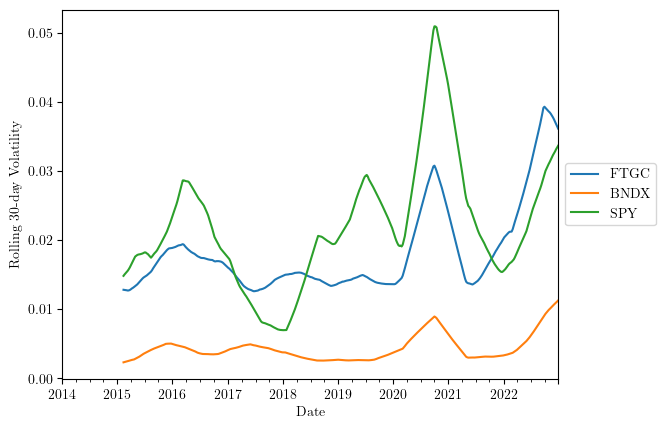

In [123]:
datatype='cross_asset'
factors_list = ['RF']
path_to_data = r"C:\Users\Rafay\Documents\thesis\ActualWork\e2e\cache"
returns, assets_list_cleaned, prices, factors = LoadData(path_to_data, e2e=True, datatype=datatype)
returns = returns.set_index('date')
returns.rolling(30).std().rolling(30).mean().plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Rolling 30-day Volatility')

Text(0, 0.5, 'Log Prices')

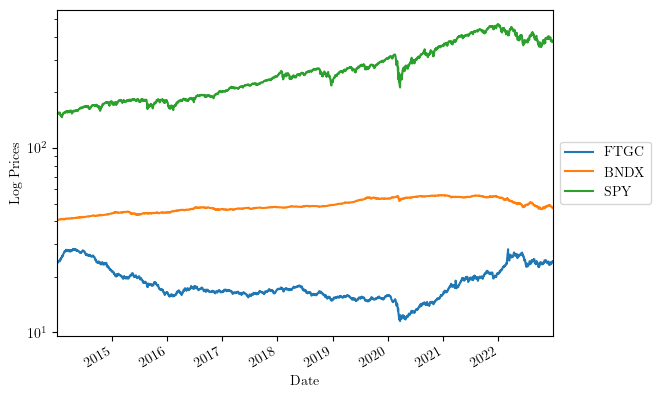

In [198]:
datatype='cross_asset'
factors_list = ['RF']
path_to_data = r"C:\Users\Rafay\Documents\thesis\ActualWork\e2e\cache"
returns, assets_list_cleaned, prices, factors = LoadData(path_to_data, e2e=True, datatype=datatype)
prices = prices.set_index('date')
returns = returns.set_index('date')
prices.plot(logy=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Date')
plt.ylabel('Log Prices')

In [41]:
import numpy as np

Text(0, 0.5, 'Av')

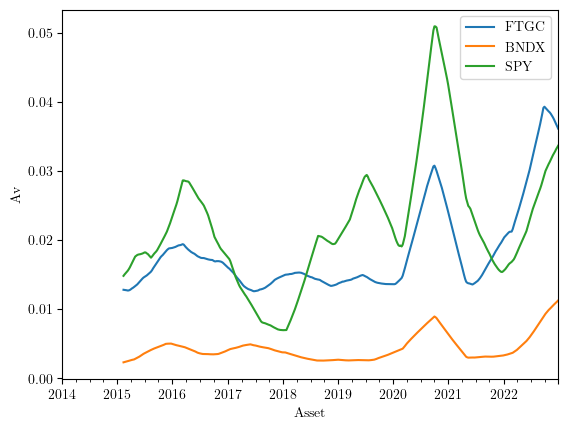

In [83]:
returns.rolling(30).std().rolling(30).mean().plot()
plt.xlabel('Asset')
plt.ylabel('Av')

Text(0, 0.5, '30-Day Rolling Correlation of Assets')

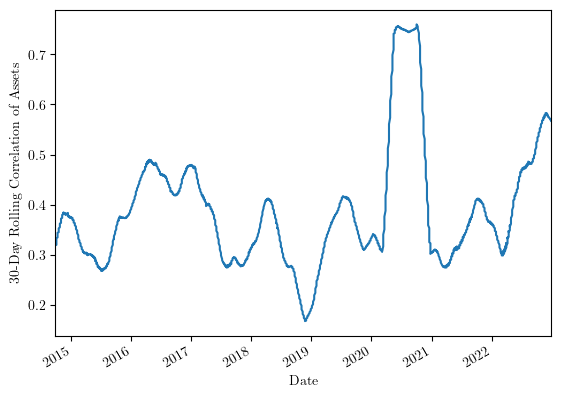

In [70]:
n = len(columns)
returns = returns.set_index('date')
rollingcor = returns.rolling(30).corr()
rollingcor.reset_index().drop('level_1', axis=1).set_index('date').mean(axis=1).rolling(30).mean().plot()
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Correlation of Assets')

In [125]:
(list(returns.columns))

['FTGC', 'BNDX', 'SPY']

In [122]:
"""
\begin{table}
\begin{description}
\item{Raw term frequencies.}
\end{description}
    \begin{tabular}{|l|l|l|l|l|}
        \hline
        term      & Dawn & Beatrice & She & Regeneration \\ \hline
        happiness & 40   & 20       & 0   & 7            \\ 
        surprise  & 23   & 43       & 7   & 0            \\ 
        family    & 32   & 0        & 15  & 12           \\ 
        adventure & 0    & 7        & 6   & 0            \\
        \hline
    \end{tabular}
\end{table}
"""

figure_describe = "Assets Used - Broad Equity Assets."
list(returns.columns)
header_row = [" "]*len(list(returns.columns))
row_1 = list(returns.columns)[0:5]
row_2 = list(returns.columns)[5:10]
row_3 = list(returns.columns)[10:15]
row_4 = list(returns.columns)[15:20]
print(len(row_1))
print(len(row_2))
print(len(row_3))
print(len(row_4))
row_data = [row_1, row_2, row_3, row_4]
print(row_data)
def write_table(assembled_parts):
    """
    input: assembled_parts
    assembled_parts will consist out of (in sequence)
    - figure_describe:  used for \item{ }
    - header_row:       contains names of the table header
    - row_data:         multi-dimensional list
    """
    
    figure_describe, header_row, row_data = assembled_parts

    # internal helper function
    def convert_row_to_latex(spacers, row_input):
        parsed = ""
        for distance in spacers:
            parsed += (" & %"+str(-distance)+"s")
        parsed = parsed[2:]
        parsed = parsed % tuple(row_input)
        parsed += " \\\\"
        return parsed

    def calculate_spacers():
        temp_cells = [header_row] + row_data
        cell_lengths = []
        for cell in range(len(header_row)):
            max_length = 0
            for col in range(len(temp_cells)):
                print("({}, {})".format(col, cell))
                cell_length = len(temp_cells[col][cell])
                if cell_length > max_length:
                    max_length = cell_length
            cell_lengths.append(max_length)

        return cell_lengths

    num_cols = len(header_row)
    fence_posts = "".join(["|l" for i in range(num_cols)]) + "|"
    
    print('\\begin{table}')
    print('\\begin{description}')
    print('\\item{%s}' % (figure_describe))
    print('\\end{description}')
    print('\t\\begin{tabular}{%s}' % (fence_posts))
    print('\t\t\\hline')

    # let's format this for human reading of the output.
    spacers = calculate_spacers()
    
    for row in range(len(row_data)+1):
        if row == 0:
            headers = convert_row_to_latex(spacers, header_row) + " \\hline"
            print("\t\t" + headers)
        else:
            row_content = convert_row_to_latex(spacers, row_data[row-1])
            print('\t\t' + row_content)
    print('\t\t\\hline')
    print('\t\\end{tabular}')
    print('\\end{table}')      

assembled_parts = [figure_describe, header_row, row_data]
write_table(assembled_parts)

5
5
5
5
[['AAPL', 'MSFT', 'AMZN', 'C', 'JPM'], ['BAC', 'XOM', 'HAL', 'MCD', 'WMT'], ['COST', 'CAT', 'LMT', 'JNJ', 'PFE'], ['DIS', 'VZ', 'T', 'ED', 'NEM']]
\begin{table}
\begin{description}
\item{Assets Used - Broad Equity Assets.}
\end{description}
	\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
		\hline
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(0, 1)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(0, 2)
(1, 2)
(2, 2)
(3, 2)
(4, 2)
(0, 3)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(0, 4)
(1, 4)
(2, 4)
(3, 4)
(4, 4)
(0, 5)
(1, 5)


IndexError: list index out of range

In [15]:
import pickle

In [16]:
with open('ResultsDRRPWDeltaTrained_deltavals_{}.pkl'.format('cross_asset'), 'rb') as f:
    delta_vals = pickle.load(f)

In [17]:
plt.plot(EW_value['date'], delta_vals)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.xlabel('Date')
plt.ylabel("$\delta$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

NameError: name 'EW_value' is not defined

In [87]:
EW_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
RP_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
NN_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
TTrain_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))

In [48]:
EW_value = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))


<AxesSubplot:xlabel='date'>

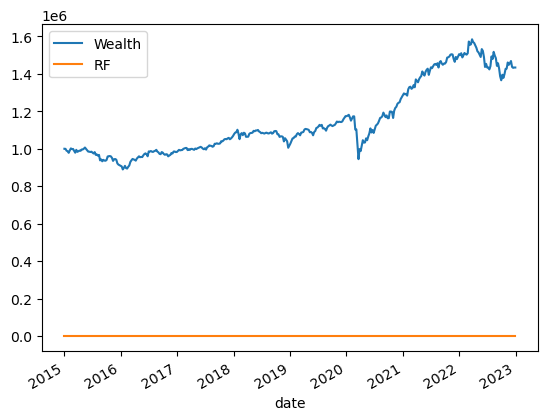

In [69]:
EW_value.plot(x='date')

In [126]:
datatype = 'cross_asset'
EW_value_holdings = pd.read_pickle('ResultsEW_{}_holdings.pkl'.format(datatype))
RP_value_holdings = pd.read_pickle('ResultsRP_{}_holdings.pkl'.format(datatype))
NN_value_holdings = pd.read_pickle('ResultsDRRPWDeltaTrained_{}_holdings.pkl'.format(datatype))
TTrain_value_holdings = pd.read_pickle('ResultsDRRPWTTrained_{}_holdings.pkl'.format(datatype))


In [ ]:
fig = plt.figure()
names = ['EW', 'RP', 'Learn $\delta$', 'DRRP Learn $T$']
frames = [EW_value_holdings, RP_value_holdings, NN_value_holdings, TTrain_value_holdings]
for indx, frame in enumerate(frames):
    frame.plot.bar()
    # plt.plot(label=names[indx])
    break
# ax.legend(names, fontsize=14)
plt.grid(visible="on",linestyle=":",linewidth=0.8)
plt.tick_params(axis='x', labelrotation = 30)
plt.ylabel("Total wealth", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12, handlelength=1)


In [206]:
import SGCharts
from distinctipy import distinctipy

ModuleNotFoundError: No module named 'distinctipy'

In [275]:
datatype='cross_asset'
f, axarr = plt.subplots(2,2, figsize=(16,8))
names = ['Equal Weight', 'Risk Parity', 'DRRP - Learn Delta', 'DRRP - Learn T']

for name in names:    
    print("""
    \begin{{figure}}[H]
    \centering
    \includegraphics[width=13cm]{img/Holdings_{name}_{datatype}.png}
    \caption{Portfolio Holdings - {datatype_name}}
    \label{fig:holdings_{name}_{datatype}}
    \end{figure}
    """.format(
                name=name,
                datatype=datatype,
                datatype_name=''
))

# axarr[0,0].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('Equal Weight', datatype)), aspect='auto')
# axarr[0,0].axis('off')
# axarr[0,1].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('Risk Parity', datatype)), aspect='auto')
# axarr[0,1].axis('off')
# axarr[1,0].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('DRRP - Learn Delta', datatype)), aspect='auto')
# axarr[1,0].axis('off')
# axarr[1,1].imshow(plt.imread('Results/Holdings_{}_{}.png'.format('DRRP - Learn T', datatype)), aspect='auto')
# axarr[1,1].axis('off')
# f.savefig('Results/{}_all.png'.format(datatype))

ValueError: unexpected '{' in field name

ConversionError: Failed to convert value(s) to axis units: ['2015-01-02', '2015-02-06', '2015-03-13', '2015-04-24', '2015-05-29', '2015-07-10', '2015-08-14', '2015-09-18', '2015-10-23', '2015-11-27', '2016-01-15', '2016-02-19', '2016-04-01', '2016-05-06', '2016-06-10', '2016-07-15', '2016-08-19', '2016-09-23', '2016-10-28', '2016-12-02', '2017-01-06', '2017-02-10', '2017-03-17', '2017-04-28', '2017-06-02', '2017-07-07', '2017-08-11', '2017-09-15', '2017-10-20', '2017-11-24', '2017-12-29', '2018-02-02', '2018-03-09', '2018-04-20', '2018-05-25', '2018-06-29', '2018-08-03', '2018-09-07', '2018-10-12', '2018-11-16', '2018-12-21', '2019-01-25', '2019-03-01', '2019-04-05', '2019-05-17', '2019-06-21', '2019-07-26', '2019-08-30', '2019-10-04', '2019-11-08', '2019-12-13', '2020-01-17', '2020-02-21', '2020-03-27', '2020-05-08', '2020-06-12', '2020-07-24', '2020-08-28', '2020-10-02', '2020-11-06', '2020-12-11', '2021-01-29', '2021-03-05', '2021-04-16', '2021-05-21', '2021-06-25', '2021-07-30', '2021-09-03', '2021-10-08', '2021-11-12', '2021-12-17', '2022-01-28', '2022-03-04', '2022-04-08', '2022-05-20', '2022-06-24', '2022-07-29', '2022-09-02', '2022-10-07', '2022-11-11', '2022-12-16']

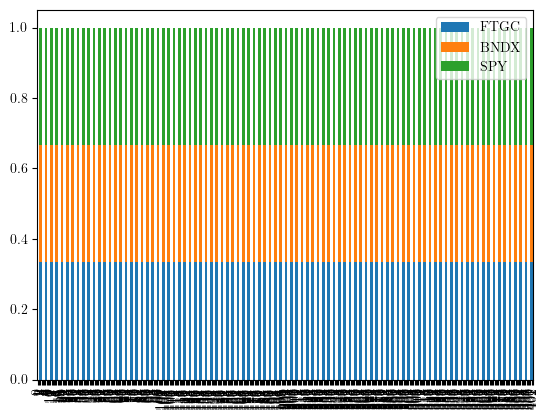

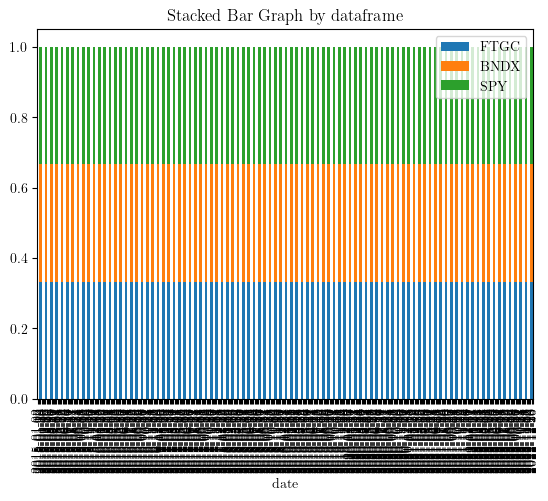

In [184]:
ax = EW_value_holdings.plot.bar(stacked=True)
ax = EW_value_holdings.plot(x='date', kind='bar', stacked=True,
        title='Stacked Bar Graph by dataframe')

dates = list(EW_value_holdings['date'])
xticks = []
for i in range(0,len(dates),5):
    xticks = xticks + [dates[i]]

ax.set_xticks(xticks)